<a href="https://colab.research.google.com/github/yeyomuri/Propuesta-Metodol-gica-para-el-Dise-o-de-un-Sistema-de-Agua-Potable-y-Saneamiento-Sostenible-/blob/main/graficas_hipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

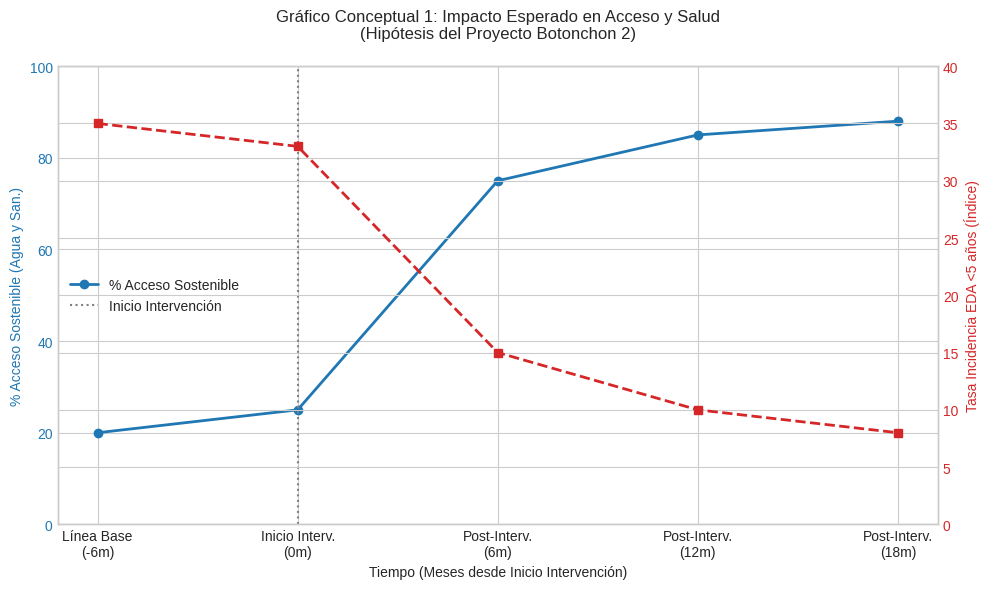

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# --- Datos Conceptuales ---
tiempo = [-6, 0, 6, 12, 18] # Meses relativos a la intervención (0 = inicio)
tiempo_labels = ['Línea Base\n(-6m)', 'Inicio Interv.\n(0m)', 'Post-Interv.\n(6m)', 'Post-Interv.\n(12m)', 'Post-Interv.\n(18m)']

# % Acceso: Empieza bajo, sube rápido y se estabiliza alto
acceso_pct = [20, 25, 75, 85, 88]

# Tasa EDA: Empieza alta, baja significativamente y se estabiliza baja
# (La bajada puede tener cierto retraso respecto al acceso)
tasa_eda = [35, 33, 15, 10, 8] # Usamos números índice, no tasas reales

# --- Crear Gráfico ---
plt.style.use('seaborn-v0_8-whitegrid') # Estilo de gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje 1 para % Acceso
color1 = 'tab:blue'
ax1.set_xlabel('Tiempo (Meses desde Inicio Intervención)')
ax1.set_ylabel('% Acceso Sostenible (Agua y San.)', color=color1)
line1 = ax1.plot(tiempo, acceso_pct, color=color1, marker='o', linestyle='-', linewidth=2, label='% Acceso Sostenible')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 100)
ax1.set_xticks(tiempo) # Asegurar que todos los puntos de tiempo aparezcan
ax1.set_xticklabels(tiempo_labels) # Usar etiquetas personalizadas

# Eje 2 para Tasa EDA
ax2 = ax1.twinx()  # Compartir el mismo eje X
color2 = 'tab:red'
ax2.set_ylabel('Tasa Incidencia EDA <5 años (Índice)', color=color2)
line2 = ax2.plot(tiempo, tasa_eda, color=color2, marker='s', linestyle='--', linewidth=2, label='Tasa Incidencia EDA')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 40) # Ajustar límite según los datos índice

# --- Títulos y Leyendas ---
plt.title('Gráfico Conceptual 1: Impacto Esperado en Acceso y Salud\n(Hipótesis del Proyecto Botonchon 2)', pad=20)
# Leyenda combinada
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right')

# Añadir línea vertical para inicio de intervención
ax1.axvline(x=0, color='grey', linestyle=':', linewidth=1.5, label='Inicio Intervención')
ax1.legend(loc='center left') # Actualizar leyenda para incluir línea vertical

fig.tight_layout() # Ajustar diseño
plt.show()

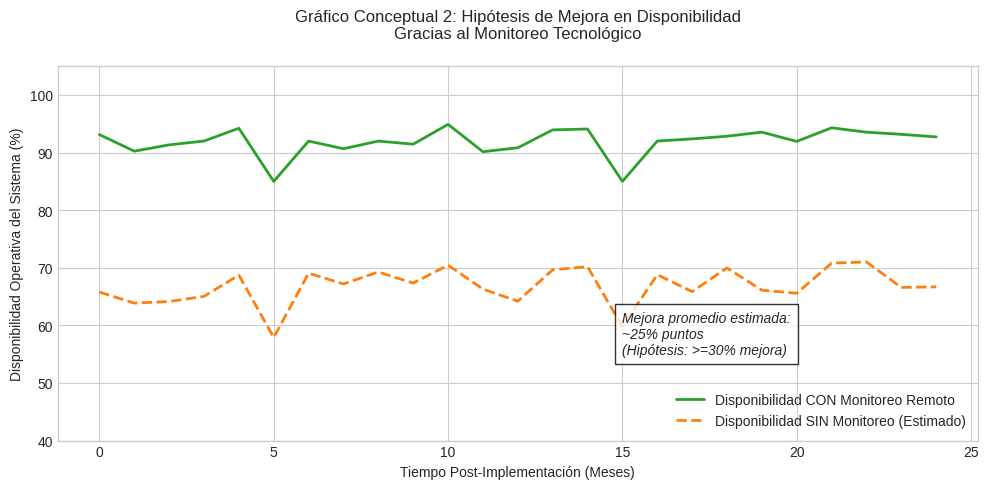

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# --- Datos Conceptuales ---
tiempo_post = np.arange(0, 25, 1) # Meses post-implementación

# Disponibilidad CON monitoreo: Alta y con recuperaciones rápidas
np.random.seed(42)
disponibilidad_con = 95 - np.random.rand(len(tiempo_post)) * 5 # Promedio alto con pequeñas fluctuaciones
# Simular recuperaciones rápidas después de pequeñas caídas
for i in [5, 15]:
    disponibilidad_con[i:i+2] = [85, 92]

# Disponibilidad SIN monitoreo: Más baja y con caídas más largas
disponibilidad_sin = 70 - np.random.rand(len(tiempo_post)) * 10 # Promedio más bajo con más fluctuaciones
# Simular caídas más largas
for i in [8, 18]:
    disponibilidad_sin[i:i+4] = [50, 55, 60, 65] # Recuperación lenta

# Asegurar diferencia conceptual (aproximada, no exacta al 30% en cada punto)
# El promedio de 'disponibilidad_con' será notablemente mayor que el de 'disponibilidad_sin'
target_diff = 25 # Representando la mejora sustancial (cercana al 30% de la base ~70)
disponibilidad_sin = np.clip(disponibilidad_con - target_diff - (np.random.rand(len(tiempo_post)) * 5 - 2.5), 40, 100) # Ajustar base sin monitoreo

# --- Crear Gráfico ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(tiempo_post, disponibilidad_con, color='tab:green', linestyle='-', linewidth=2, label='Disponibilidad CON Monitoreo Remoto')
ax.plot(tiempo_post, disponibilidad_sin, color='tab:orange', linestyle='--', linewidth=2, label='Disponibilidad SIN Monitoreo (Estimado)')

# --- Títulos y Leyendas ---
ax.set_xlabel('Tiempo Post-Implementación (Meses)')
ax.set_ylabel('Disponibilidad Operativa del Sistema (%)')
ax.set_title('Gráfico Conceptual 2: Hipótesis de Mejora en Disponibilidad\nGracias al Monitoreo Tecnológico', pad=20)
ax.legend(loc='lower right')
ax.set_ylim(40, 105)
ax.grid(True)

# Anotación sobre la mejora
avg_con = np.mean(disponibilidad_con)
avg_sin = np.mean(disponibilidad_sin)
diff_text = f"Mejora promedio estimada:\n~{avg_con-avg_sin:.0f}% puntos\n(Hipótesis: >=30% mejora)"
ax.text(15, 55, diff_text, style='italic', bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})


fig.tight_layout()
plt.show()